# Pima Indians Diabetes Analysis (In Python)

## Introduction: 
Here, we take a look at the Pima Indians Diabetes dataset and follow through with the following steps:

1. Descriptive Statistics
2. Data Visualization
3. Data Preprocessing
4. Prediction Algorithm Evaluation
5. Model Comparison and Selection
6. Algorithm Tuning
7. Ensemble Machine Learning Methods

## 1.1 Load Dataset/Modules

In [1]:
# main data analysis modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# model evaluation techniques
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold

# Machine learning classification algorithms to use
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import Imputer, LabelEncoder, Binarizer, StandardScaler  # data preprocessing 

from sklearn import pipeline

from sklearn.metrics import accuracy_score, confusion_matrix # evaluation metrics

from sklearn.feature_selection import RFE, chi2, SelectFromModel
from sklearn.decomposition import PCA

from statsmodels.formula.api import ols # statistics tools
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.decomposition import PCA
from patsy import dmatrices

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Since the data file for the pima indians from the UCI Machine learning site is in .data format, we needed to read it in line by line and change the data to numeric types

In [2]:
# reading in the diabetes file line by line
f = open('C:/Diabetes/pima_indians_diabetes.data', 'r')

# our variables  (class is our target var)
diabetes = pd.DataFrame(columns = ['num_preg', 'glucose_concen', 'blood_pressure', 'skin_fold_thick', 'two_hour_insulin', 'bmi','dpf','age', 'd_class'])

i = 0
next(f)
for line in f:
    current = line.split(",")
    current[(len(current)-1)] = current[(len(current)-1)].rstrip()
    for k in range(0, len(current)):
        if '.' in current[k]: # changing types of input from object (string) to numeric
            current[k] = float(current[k])
        else:
            current[k] = int(current[k])
    diabetes.loc[i] = current
    i += 1

predictors = diabetes.columns.values[0:-1] 
target = diabetes.columns.values[-1] # our dependent var


## 1.2: Descriptive Statistics

In [3]:
# initial peek at the data (descriptive statistics)
diabetes.head()

,num_preg,glucose_concen,blood_pressure,skin_fold_thick,two_hour_insulin,bmi,dpf,age,d_class
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0


In [4]:
diabetes.info() # looking at object types 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 0 to 766
Data columns (total 9 columns):
num_preg            767 non-null float64
glucose_concen      767 non-null float64
blood_pressure      767 non-null float64
skin_fold_thick     767 non-null float64
two_hour_insulin    767 non-null float64
bmi                 767 non-null float64
dpf                 767 non-null float64
age                 767 non-null float64
d_class             767 non-null float64
dtypes: float64(9)
memory usage: 59.9 KB


In [5]:
diabetes.describe() # general statistics (mean, min, mod, etc)

,num_preg,glucose_concen,blood_pressure,skin_fold_thick,two_hour_insulin,bmi,dpf,age,d_class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes.isnull().any() # checking for missing values

num_preg            False
glucose_concen      False
blood_pressure      False
skin_fold_thick     False
two_hour_insulin    False
bmi                 False
dpf                 False
age                 False
d_class             False
dtype: bool

In [7]:
diabetes.duplicated().any() # checking for duplicated rows

False

Now we'll look at the correlation matrix of all the variables involved. 

In [8]:
correlation_matrix = diabetes.corr()
correlation_matrix

,num_preg,glucose_concen,blood_pressure,skin_fold_thick,two_hour_insulin,bmi,dpf,age,d_class
num_preg,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
glucose_concen,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
blood_pressure,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
skin_fold_thick,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
two_hour_insulin,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
bmi,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
dpf,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
age,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
d_class,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


In [9]:
class_counts = diabetes.groupby('d_class').size() #looking at observations per class of our diabetes class
class_counts

d_class
0.0    500
1.0    267
dtype: int64

## 2.1: Data Visualization 
Now we'll plot the histogram/density distribution of each variables (most variables are numeric, using seaborn)

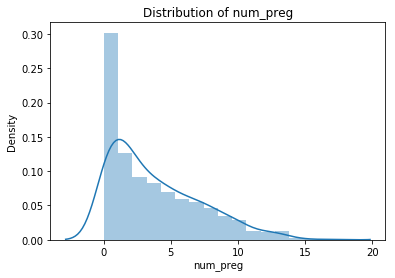

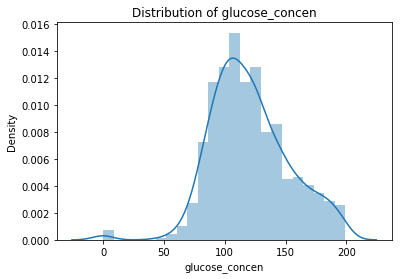

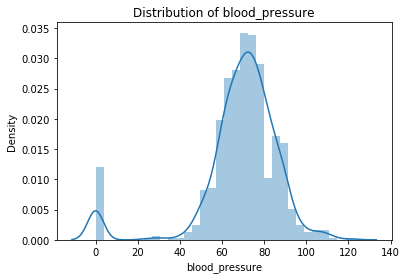

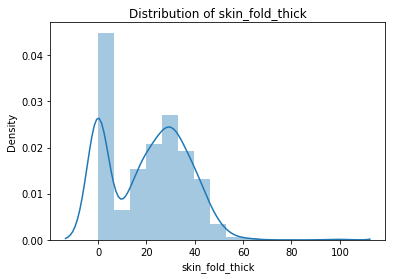

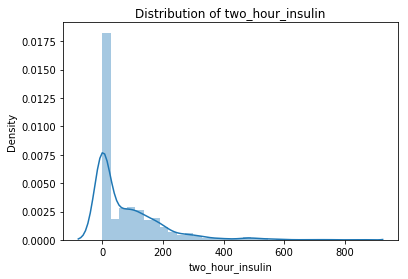

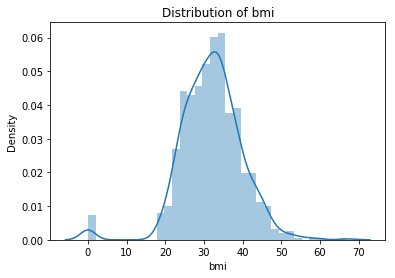

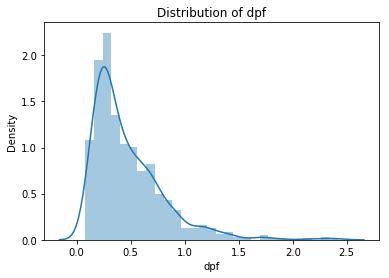

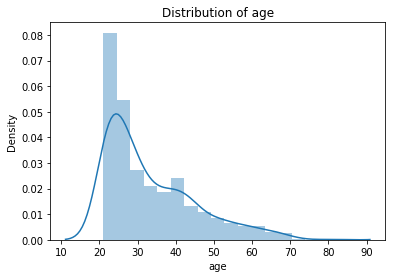

In [10]:
# Data visualization using seaborn
for p in predictors:
    sns.distplot(diabetes[p])
    plt.title("Distribution of %s" %(p))
    plt.xlabel(p)
    plt.ylabel("Density")
    plt.show()


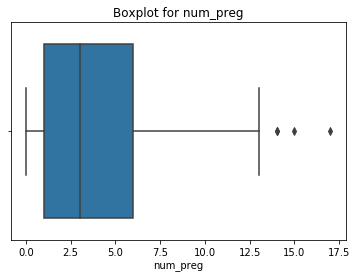

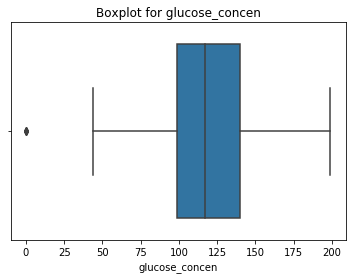

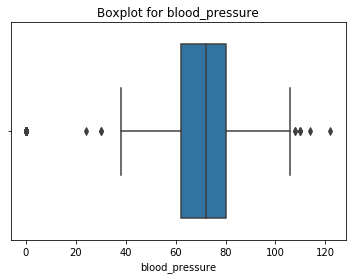

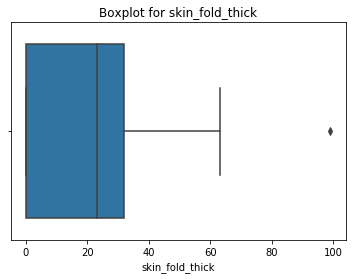

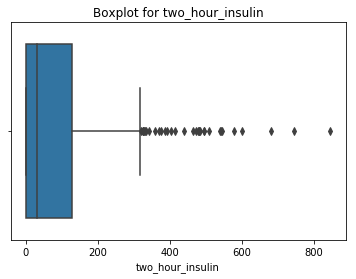

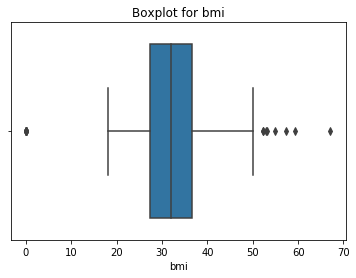

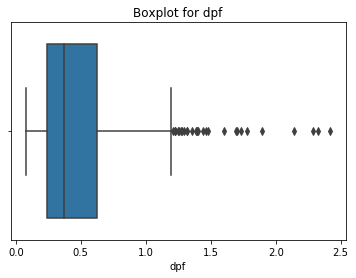

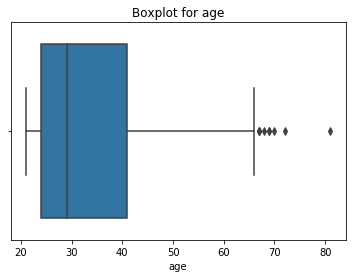

In [11]:
for p in predictors: # plotting boxplots
    sns.boxplot(diabetes[p])
    plt.title("Boxplot for %s" %(p))
    plt.xlabel(p)
    plt.show()

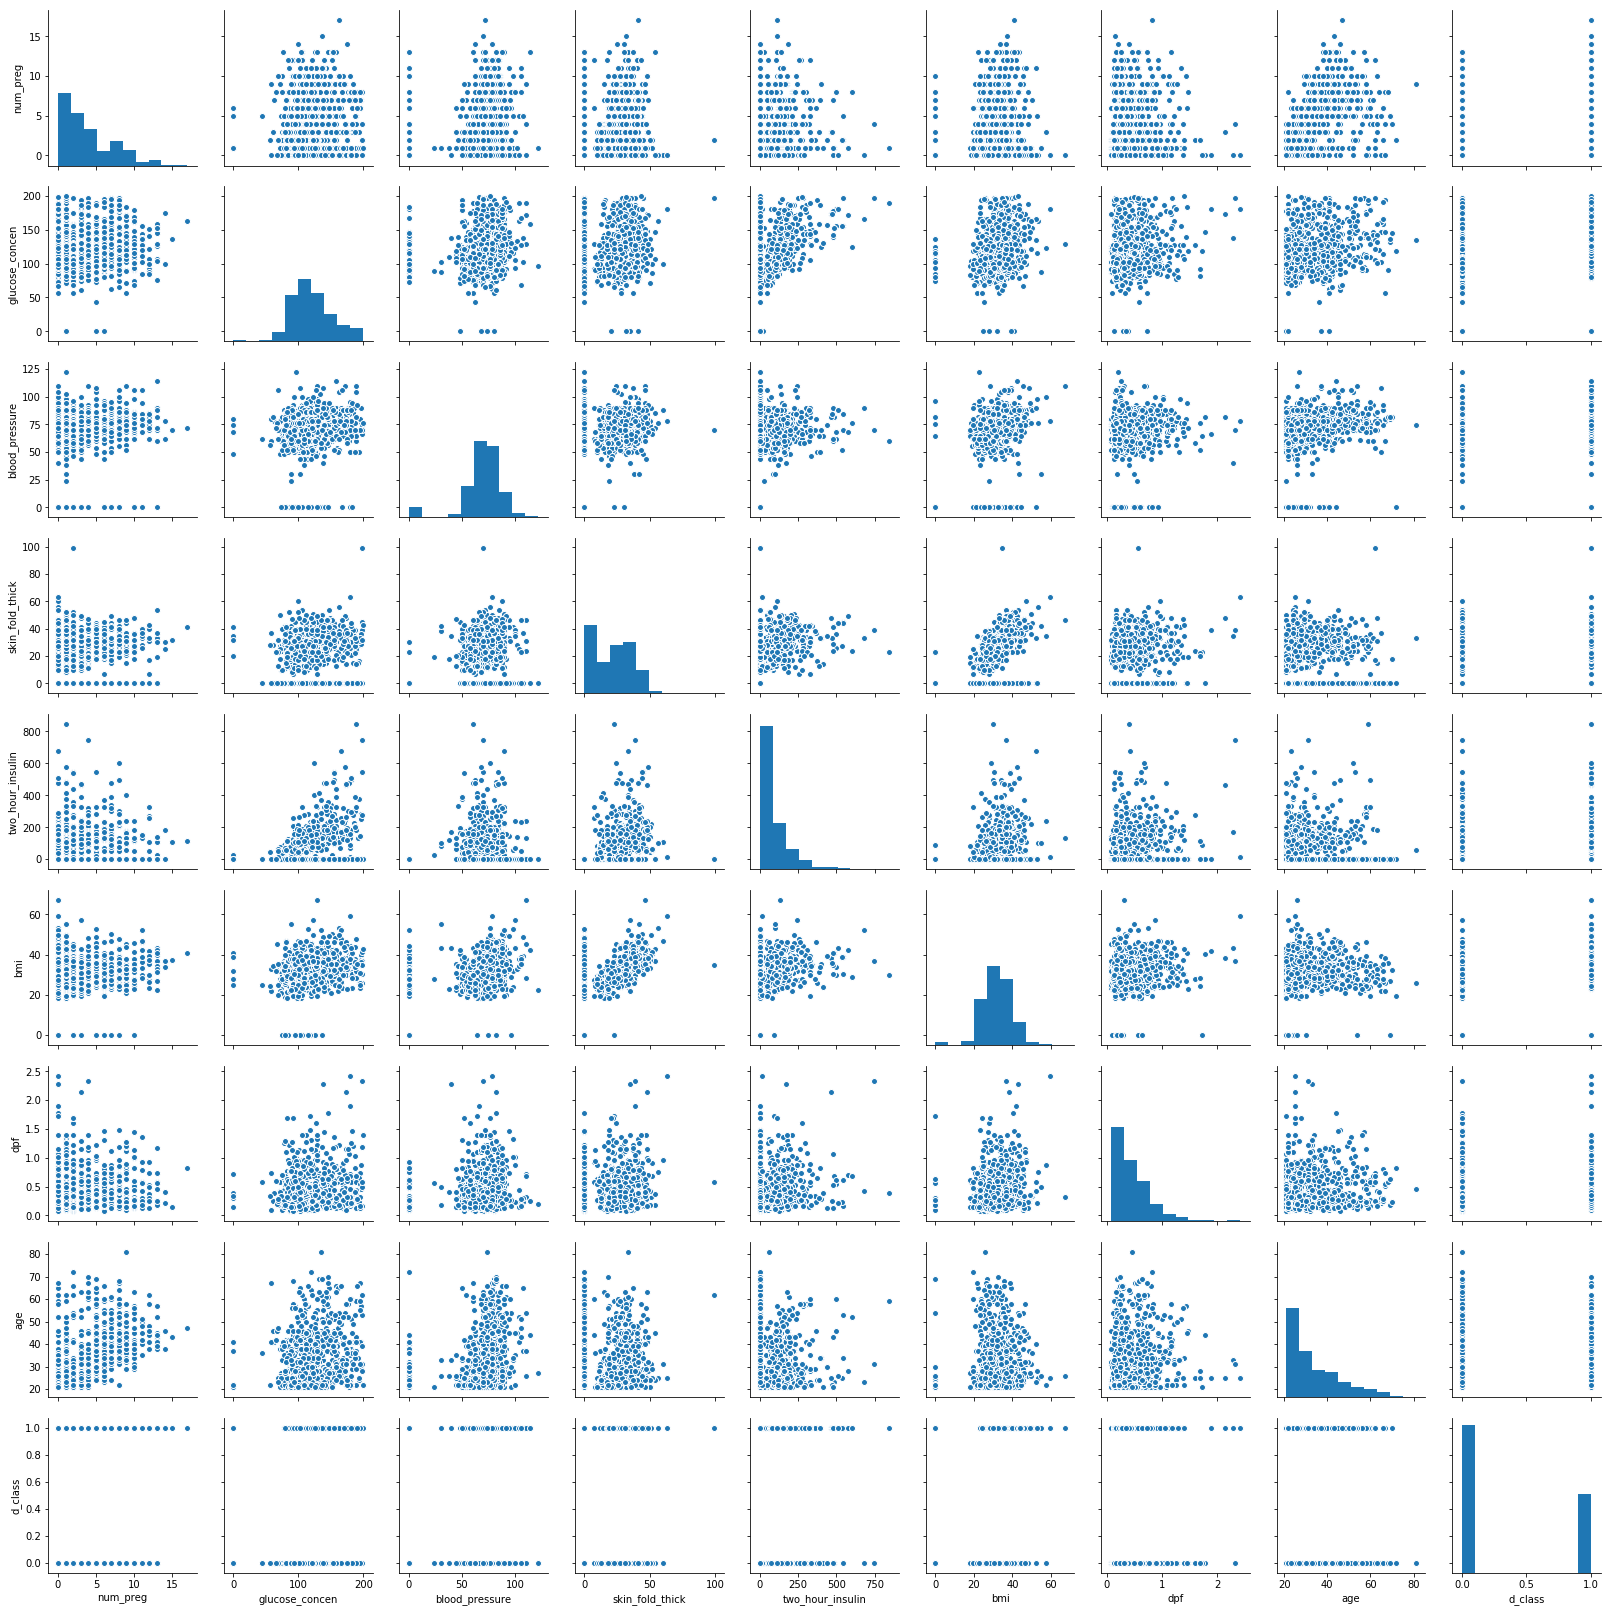

In [12]:
# pairwise relations
sns.pairplot(diabetes)
plt.show()

## 3.1: Data Preprocessing
Here, we standardize the variables

In [13]:
# standardize variables 
sc = StandardScaler()
diabetes[predictors] = sc.fit_transform(diabetes[predictors])
diabetes.head()

,num_preg,glucose_concen,blood_pressure,skin_fold_thick,two_hour_insulin,bmi,dpf,age,d_class
0,-0.843726,-1.122086,-0.160249,0.532023,-0.693559,-0.683729,-0.364265,-0.188940,0.0
1,1.234240,1.944476,-0.263578,-1.286882,-0.693559,-1.102301,0.604701,-0.103795,1.0
2,-0.843726,-0.996920,-0.160249,0.155698,0.122357,-0.493469,-0.919684,-1.040393,0.0
3,-1.140579,0.505069,-1.503534,0.908349,0.764674,1.409132,5.482732,-0.018650,1.0
4,0.343683,-0.152051,0.253070,-1.286882,-0.693559,-0.810569,-0.817052,-0.274086,0.0


In [ ]:
# find and remove outliers
def outlierRemoval(dataset, variables):
    outliers = []
    for v in variables:
        print(v)
        m = np.mean(dataset[v])
        sd = np.std(dataset[v])
        outliers = dataset[v][abs(dataset[v]-m) > sd*3]
        outliers= list(outliers)
        dataset[p] = dataset[p].replace(outliers, [3]*len(outliers), inplace = True)      
    return dataset

diabetes_new = outlierRemoval(diabetes, predictors)

In [ ]:
# Recursive feature elimination
svc = SVC()
rfe = RFE(estimator = svc, n_features_to_select = 6)
# pipeline - using SVC to sleect best features
clf = Pipeline([('feature_selection', SelectFromModel(LinearSVC(penality = "l1"))), ('classification', RandomForestClassifier())])

In [14]:
# looking at the variance inflation factor of variables
def VIF(dataset, variables, dep_var):
    features = '+'.join(dataset[variables].columns)
    y, X = dmatrices(dep_var + '~' + features, dataset, return_type ='dataframe')
    vif = pd.DataFrame()
    vif['variables'] = X.columns[1:]
    vif['VIF'] = [variance_inflation_factor(dataset[variables].values, i) for i in range(0, dataset[variables].shape[1])]
    return vif

vif_multi_var = VIF(diabetes, predictors, target)
vif_multi_var.head()

,variables,VIF
0,num_preg,1.430170
1,glucose_concen,1.299281
2,blood_pressure,1.182160
3,skin_fold_thick,1.511085
4,two_hour_insulin,1.430932


## 5: Model Comparison and Selection

In [15]:
# model comparison
models = []

lr = LogisticRegression()
nn = MLPClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
#vote = VotingClassifier()
gb = GradientBoostingClassifier()

model_results = pd.DataFrame(columns = ['Model','Accuracy','Stdev'])

models = [['LogisticRegression',lr],['NeuralNetwork',nn], ['KNearestNeighbors', knn], ['GaussianNB', gnb], ['RandomForest', rf], 
          ['ADABoost', ada], ['GradientBoosting', gb]] # our models
i = 0
for name, m in models:
    kfold = KFold(n_splits = 10, random_state = 7)
    cv_results = cross_val_score(m, diabetes[predictors], diabetes[target], cv = kfold, scoring = 'accuracy')
    model_results.loc[i] = [name, cv_results.mean(), cv_results.std()]
    i += 1
    
model_results

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

,Model,Accuracy,Stdev
0,LogisticRegression,0.779751,0.052144
1,NeuralNetwork,0.777153,0.055488
2,KNearestNeighbors,0.738038,0.070964
3,GaussianNB,0.754938,0.042418
4,RandomForest,0.752409,0.081471
5,ADABoost,0.757553,0.049499
6,GradientBoosting,0.777102,0.066566
